# Kolmogorov–Smirnov Test

In statistics, the Kolmogorov–Smirnov test (K–S test or KS test) is a nonparametric test of the equality of continuous (or discontinuous), one-dimensional probability distributions that can be used to compare two samples (two-sample K–S test). In essence, the test answers the question "What is the probability that these two sets of samples were drawn from the same (but unknown) probability distribution?".

In [1]:
import metaspore as ms
import numpy as np
import sys

sys.path.append('../../') 

#### 1. Load prediction results:

In [2]:
spark_session = ms.spark.get_session(local=True, app_name='Default estimation KS metric')

eval_test_dataset = spark_session.read.parquet('${MY_S3_BUCKET}/risk/tianchi/eval_test_dataset.parquet')
eval_test_dataset.limit(10).toPandas()

22/06/07 08:21:27 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/06/07 08:21:27 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
/opt/spark/python/pyspark/sql/pandas/conversion.py:87: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


,isDefault,features,rawPrediction,probability,prediction
0,0,"[1000.0, 3.0, 6.97, 30.87, 1.0, 2.0, 123318.0,...","[2.337995530153171, -2.337995530153171]","[0.911975306477623, 0.088024693522377]",0.0
1,0,"[1000.0, 3.0, 15.99, 35.16, 3.0, 14.0, 215340....","[-0.10965281459904996, 0.10965281459904996]","[0.4726142307997735, 0.5273857692002265]",1.0
2,0,"[1000.0, 3.0, 18.24, 36.28, 4.0, 19.0, 64536.0...","[0.32907556139404964, -0.32907556139404964]","[0.5815344297028524, 0.41846557029714754]",0.0
3,1,"[1500.0, 3.0, 11.49, 49.46, 2.0, 9.0, 212874.0...","[0.8718348674582469, -0.8718348674582469]","[0.7051273522619355, 0.2948726477380646]",0.0
4,0,"[1500.0, 3.0, 13.49, 50.9, 3.0, 11.0, 89676.0,...","[-0.1605600898253861, 0.1605600898253861]","[0.45994598843603185, 0.5400540115639682]",1.0
5,1,"[1500.0, 3.0, 16.99, 53.48, 4.0, 17.0, 6600.0,...","[-0.4225961586637862, 0.4225961586637862]","[0.39589567937414427, 0.6041043206258557]",1.0
6,0,"[1600.0, 3.0, 10.64, 52.11, 2.0, 8.0, 203091.0...","[0.9316509455109415, -0.9316509455109415]","[0.7174101064763352, 0.2825898935236648]",0.0
7,0,"[1600.0, 3.0, 13.53, 54.32, 2.0, 9.0, 65718.0,...","[1.2519325976063975, -1.2519325976063975]","[0.777634223779675, 0.22236577622032502]",0.0
8,0,"[1800.0, 3.0, 12.73, 60.42, 2.0, 9.0, 61357.0,...","[2.783424036088894, -2.783424036088894]","[0.9417734897923757, 0.05822651020762423]",0.0
9,0,"[1800.0, 3.0, 19.99, 66.89, 5.0, 20.0, 234119....","[0.2507570877638907, -0.2507570877638907]","[0.5623628372077925, 0.4376371627922075]",0.0


#### 2. Extract label and prediction: 
We only use the column 'isDefault' as label and the second value of probability as prediction.

In [3]:
label = np.array(eval_test_dataset.select('isDefault').collect()).reshape(-1).astype(np.float32)
prediction = np.array(eval_test_dataset.select('probability').collect())[:, :, 1].reshape(-1)

In [4]:
print('label: ', label[0:10])
print('prediction: ', prediction[0:10])

label:  [0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
prediction:  [0.08802469 0.52738577 0.41846557 0.29487265 0.54005401 0.60410432
 0.28258989 0.22236578 0.05822651 0.43763716]


#### 3. Calculate KS statistic:

In [5]:
from common.ks_utils import ks_2samp, ks_curve

ks = ks_2samp(label, prediction)
print("KS statistic: ", ks.statistic)

KS statistic:  0.3408877950211097


#### 4. Plot KS curve:

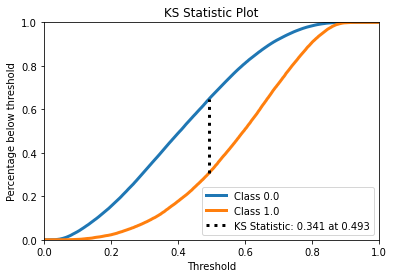

In [6]:
import matplotlib.pyplot as plt

ks_curve(label, prediction)
plt.show()